# Project: tmdb-movies.csv
## Abdallah Sayed Ali

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analysis a dataset about 10,000 movies,

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

+ Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
+ There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
+ The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### we will trying to answer some question from this dataset:

1- Which genres are most popular from year to year?

2- What kinds of properties are associated with movies that have high revenues?

In [1]:
# import Libraries to use it in analysing dataset
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

###### we'll read our dataset, explore it, write some notes about the dataset, check for cleanliness and clean our dataset for facilitate our analysis.

### General Properties

In [2]:
# read the dataset 'tmdb-movies.csv'
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# see first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# try to see missing data, columns & data types ( info of dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### we have here budget  and revenue columns , so we could create profit column 

In [5]:
# add new column called profit based on budget of the movie and its revenue
# using insert function 
df.insert(2,'profit',df.budget - df.revenue)

In [6]:
# shape of dataset 
df.shape

(10866, 22)

In [7]:
# see how many duplicated values 
df.duplicated().sum()

1

In [8]:
# see duplicated row 
df[df.duplicated()]

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,29033000,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# check if revenue have 0 values
sum(df.revenue == 0) , sum(df.revenue_adj == 0)

(6016, 6016)

In [10]:
# check if budget have 0 values
sum(df.budget == 0)

5696


###### it seems that 6016 have 0 revenue of 10866 total and 5696 have 0 budget of 10866 total

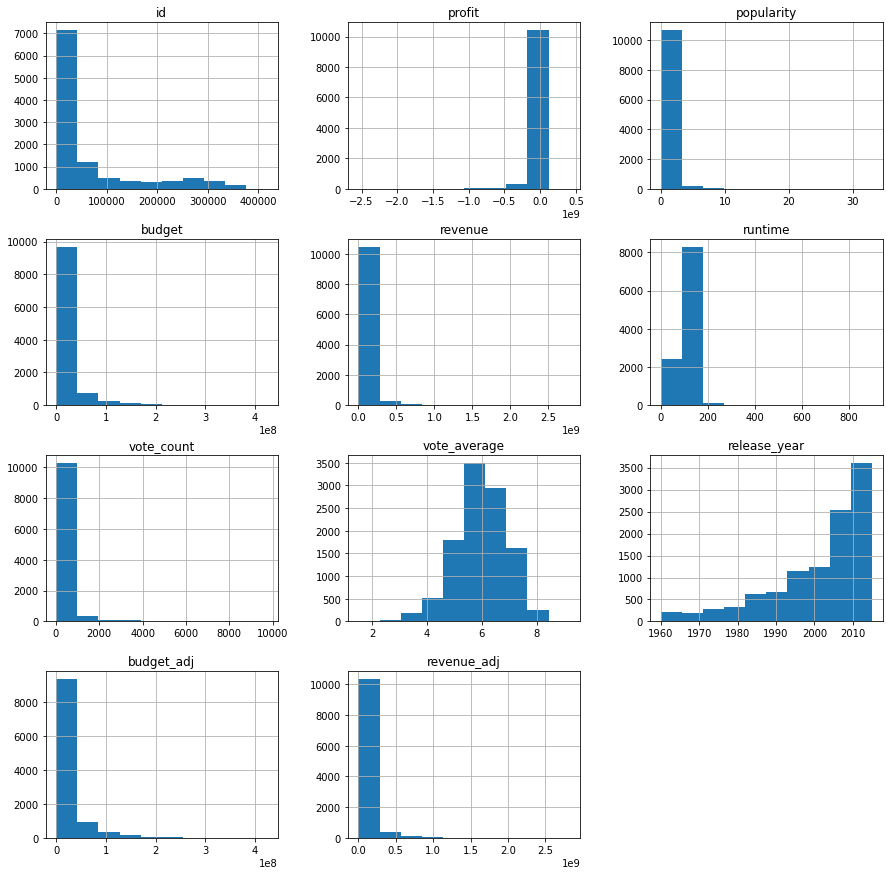

In [11]:
# explore our data by histogram to make it easy 
df.hist(figsize=(15,15));

It seems here in histogram of release_year that more than 3000 movies have been released in 2010 & continuous
increaseing  


In [12]:
# check if we have negative profits in our dataset 
sum(df.profit <=0)

8478

There are 8478 movies have negative profit (they field to make profit)

### Data Cleaning

After exploring our dataset we notice some points to keep in mind for cleaning our data ( wrangling ):

+ drop unnecessary columns 
+ modify release_date to date formate
+ drop 0s values
+ delete duplicated values
+ get rid of negative profit

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

###### drop unnecessary columns

In [14]:
# drop unnecessary columns such as id, imdb_id ,popularity, tagline, etc

#list for unnecessary columns
delete_col = ['id','imdb_id','popularity','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj','vote_average','vote_count']

df.drop(columns=delete_col,axis=1,inplace=True)

In [15]:
# check dataset after droping unnecessary columns
df.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,-1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,-228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,-185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,-1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,-1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


###### modify release_date to date formate


In [16]:
# change the datetume of release date 
df.release_date = pd.to_datetime(df.release_date)

#check
df.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,-1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,-228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,-185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,-1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,-1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


###### drop 0s values

In [17]:
# replace the 0s values of revenue and budget to NAN 
# then drop by nan values 

#revenue
df.revenue.replace(0, np.NAN, inplace=True)

In [18]:
#budget
df.budget.replace(0, np.NAN, inplace=True)

In [19]:
#drop by nan values from revenue and budget
df.dropna(subset=['revenue','budget'],inplace=True)

In [20]:
# check for 0s values
sum(df.revenue == 0), sum(df.revenue == 0)

(0, 0)

In [21]:
# check for nan values
df.revenue.isna().sum() , df.budget.isna().sum()

(0, 0)

###### delete duplicated values

In [22]:
# using drop_duplicates
df.drop_duplicates(inplace=True)

In [23]:
#check
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   profit          3854 non-null   int64         
 1   budget          3854 non-null   float64       
 2   revenue         3854 non-null   float64       
 3   original_title  3854 non-null   object        
 4   cast            3850 non-null   object        
 5   director        3853 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 331.2+ KB


In [25]:
df.shape

(3854, 10)

###### here our data has 3854 rows & 10 columns from 10866 rows & 21 columns after cleaning it

In [26]:
df.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,-1363528810,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,-228436354,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,-185238201,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,-1868178225,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,-1316249360,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


###### get rid of negative profit

In [27]:
# get rid of negative profit
# we can take the succesed movies (success to make profit) in another dataframe 
# called df_s short for dataframe success
# we wil use query

df_s = df.query("profit > 0")

# Check
sum(df_s.profit <= 0)

0

In [28]:
df_s.shape

(1072, 10)

###### we have now 1072 movies have made profit more than $0 form total 10866 movies 

In [29]:
df_s.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
57,29581440,60000000.0,30418560.0,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,2015-01-21,2015
59,52247060,70000000.0,17752940.0,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,2015-01-13,2015
66,6179242,100000000.0,93820758.0,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122,Thriller|Drama|Adventure|Action|History,2015-11-20,2015
73,21611680,150000000.0,128388320.0,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111,Adventure|Family|Fantasy,2015-09-24,2015
84,9136685,11000000.0,1863315.0,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,94,Action|Crime|Drama,2015-01-15,2015


In [30]:
# reindexing the data frame
# start from 1 instead of 0
df_s.index = range(len(df_s))
df_s.index = df_s.index +1
#check
df_s.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
1,29581440,60000000.0,30418560.0,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,2015-01-21,2015
2,52247060,70000000.0,17752940.0,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,2015-01-13,2015
3,6179242,100000000.0,93820758.0,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122,Thriller|Drama|Adventure|Action|History,2015-11-20,2015
4,21611680,150000000.0,128388320.0,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111,Adventure|Family|Fantasy,2015-09-24,2015
5,9136685,11000000.0,1863315.0,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,94,Action|Crime|Drama,2015-01-15,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 Which genres are most popular from year to year?
we'll determine the most popular genres by the highest movie profit of the year & the highest movie revenue of the year 

In [31]:
genres = df_s.groupby(df_s.release_year)[['genres','revenue','profit']].max()
genres

,genres,revenue,profit
release_year,,,
1961,Western|Action,4300000.0,1700000
1963,Action|Drama|History,10000000.0,7000000
1965,Drama|History,12000000.0,8000000
1967,Comedy|Romance,9000000.0,9000000
1968,Drama|Romance|Science Fiction,814666.0,135334
1969,Adventure|Western,638641.0,5605446
1970,Drama|Romance,3500000.0,8500000
1977,Action|Thriller|Adventure,12000000.0,10000000
1978,Adventure|Family|Fantasy|Music|Science Fiction,21049053.0,2950947


### Question 2  What kinds of properties are associated with movies that have high revenues?

In [32]:
# first let see how many movies have made above $10M profit
sum(df_s.profit >=10000000)

481

481 movies have made above 10 million dollars, so let's filter our data by profit greater than or equal $10M

In [33]:
# let's make it in another dataframe called df_s2
df_s2 = df_s.query("profit >= 10000000")
# Check
df_s2.shape

(481, 10)

In [34]:
df_s2.head()

,profit,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
1,29581440,60000000.0,30418560.0,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,2015-01-21,2015
2,52247060,70000000.0,17752940.0,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,2015-01-13,2015
4,21611680,150000000.0,128388320.0,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111,Adventure|Family|Fantasy,2015-09-24,2015
7,46675670,50000000.0,3324330.0,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,137,Crime|Thriller,2015-03-15,2015
10,19791412,20000000.0,208588.0,Dark Places,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,113,Drama|Mystery|Thriller,2015-03-31,2015


Let is see The Frequent director 

In [35]:
# using groupby with the sum of the directors 
director = df_s2.groupby(df_s2.director)['profit'].sum()
director

director
Aaron Blaise|Robert Walker    99999750
Abel Ferrara                  12571132
Adam Rifkin                   47773556
Adam Shankman                 15581387
Adrian Lyne                   71204022
                                ...   
William Malone                21097985
William Monahan               20355892
Wolfgang Petersen             10488969
Woody Allen                   11264269
Wych Kaosayananda             50075967
Name: profit, Length: 394, dtype: int64

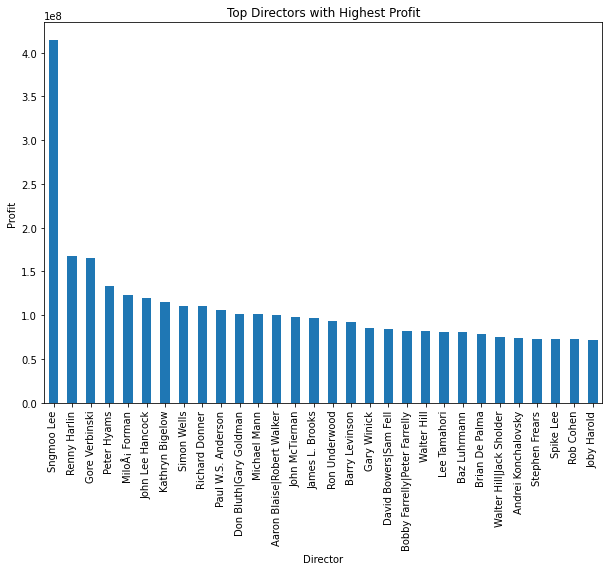

In [36]:
#plot the bar graph for directors
d = director.sort_values(ascending =False).head(30) # Top 30 directors
d.plot.bar(x = 'director',y = 'profit',figsize = (10,7))
plt.xlabel ('Director')
plt.ylabel ('Profit')
plt.title ('Top Directors with Highest Profit')
plt.show()

###### Sngmoo Lee one of the most director that made highest movies profit

Let's see the best runtime by its mean

In [37]:
df_s2.runtime.mean()

109.75051975051976

/home/abdallah/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

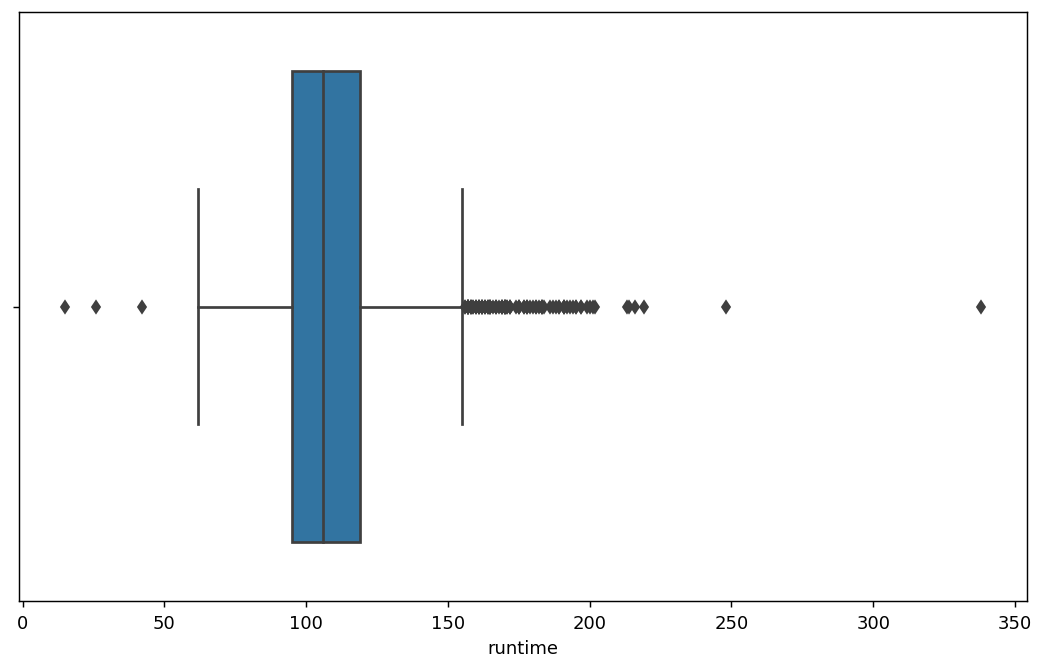

In [38]:
#using seaborn to generate the boxplot
plt.figure(figsize=(10,6),dpi=130)
sns.boxplot(df.runtime)

###### 110 runtime is the best for high profit & in range of 100 - 120

Let's see the best budget by its mean

In [39]:
# to int
int(df_s2.budget.mean())

44821740

<AxesSubplot:xlabel='budget'>

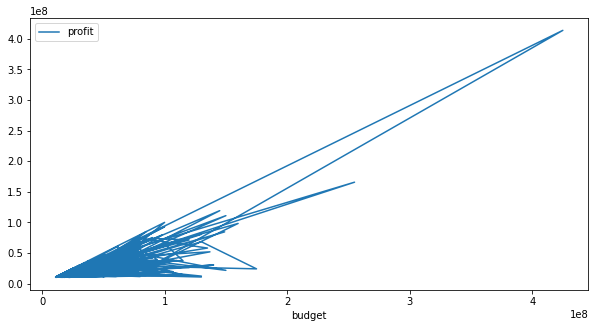

In [40]:
df_s2.plot(x='budget',y='profit',kind='line',figsize=(10,5))

Let's see the most genres

In [41]:
# split genres column ( dataframe with genres only of each movie)
genres = df_s2["genres"].str.split("|", expand=True) 

In [42]:
# list with number of movies made per genre
genres2 = genres.apply(pd.value_counts)
genres2.drop([1, 2, 3, 4], axis=1, inplace=True)
genres2

,0
Action,111.0
Adventure,48.0
Animation,12.0
Comedy,66.0
Crime,20.0
Drama,129.0
Family,3.0
Fantasy,14.0
Foreign,NaN
History,1.0


Text(0.5, 0, 'Genres')

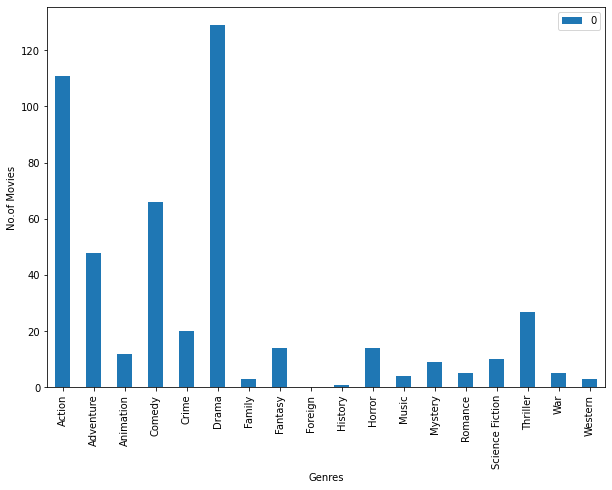

In [43]:
# plot high movies profit according to genres
ax = genres2.plot(kind='bar',figsize=(10, 7))
plt.ylabel('No.of Movies')
plt.xlabel('Genres')

This graphy show that Action ,Drama are the top genres according to high profit

Let's see what's the top cast

In [44]:
# using groupby with the sum of the cast 
cast = df_s2.groupby(df_s2.cast)['profit'].sum()
cast

cast
Abbie Cornish|Andrea Riseborough|James D'Arcy|Richard Coyle|David Harbour       14131561
Adam Sandler|Seth Rogen|Leslie Mann|Eric Bana|Jonah Hill                        13541018
Adam Sandler|Susan Sarandon|Eva Amurri Martino|Leighton Meester|Andy Samberg    11941633
Adam Sandler|TÃ©a Leoni|Paz Vega|Cloris Leachman|Shelbie Bruce                  24958633
Al Pacino|Alicia Witt|Leelee Sobieski|Amy Brenneman|William Forsythe            13069116
                                                                                  ...   
Woody Allen|Kathy Bates|John Cusack|Mia Farrow|Jodie Foster                     11264269
Woody Harrelson|Courtney Love|Edward Norton|Brett Harrelson|Donna Hanover       15699615
Woody Harrelson|Steve Buscemi|Ben Foster|Robin Wright|Jon Bernthal              11027488
Zac Efron|Claire Danes|Christian McKay|Imogen Poots|Zoe Kazan                   22663828
Zac Efron|Matthew McConaughey|Nicole Kidman|John Cusack|David Oyelowo           11146132
Name: profit, Le

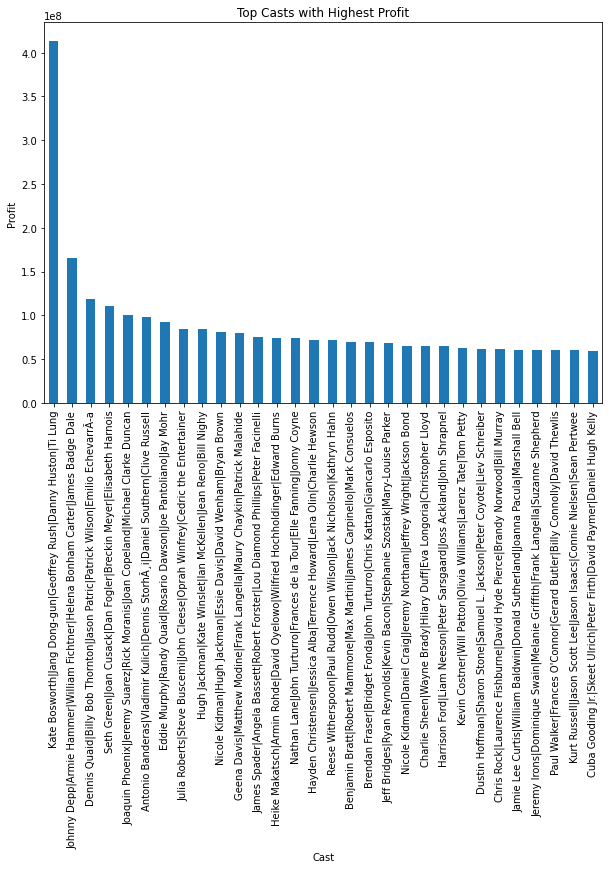

In [45]:
#plot the bar graph for directors
c = cast.sort_values(ascending =False).head(30) # Top 30 directors
c.plot.bar(x = 'cast',y = 'profit',figsize = (10,7))
plt.xlabel ('Cast')
plt.ylabel ('Profit')
plt.title ('Top Casts with Highest Profit')
plt.show()

In [46]:
df_s2.describe()

,profit,budget,revenue,runtime,release_year
count,4.810000e+02,4.810000e+02,4.810000e+02,481.000000,481.000000
mean,2.608861e+07,4.482174e+07,1.873313e+07,109.750520,2003.220374
std,2.518663e+07,3.482620e+07,2.165753e+07,21.987689,7.485074
min,1.000000e+07,1.100000e+07,5.000000e+00,63.000000,1977.000000
25%,1.354102e+07,2.300000e+07,4.627375e+06,97.000000,1998.000000
50%,1.979141e+07,3.500000e+07,1.200000e+07,106.000000,2004.000000
75%,3.051780e+07,6.000000e+07,2.415993e+07,118.000000,2009.000000
max,4.139124e+08,4.250000e+08,1.509625e+08,338.000000,2015.000000


<a id='conclusions'></a>
## Conclusions


### We started out looking at two questions 

+ What genre is the most popular for each year? 

+ what kinds of properties are associated with movies that have high revenues?

We deduce that Drama & Action are the top genres that made the highest movies profit

we also conclude that to make the movie high profit we should make the Budget in range between 45M and 55M dollar,

and the duration of the movie should in range 110-120 minutes *runtime of the movie* 

and genres of the movie should be Action or Drama.

and Any one of these should be in the cast: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz 

Limitations

This dataset does not contain all movies which were released and the directors' names. 
also I just know the total revenue of every movie. It would be great to know. One the same hand, most movies are missing values of revenues and budgets this lead to more than half of the rows have removed because of null values & 0s values. Else the graph could have been skewed or flattened. so It's not 100 percent guaranteed solution that this formula is right 100%